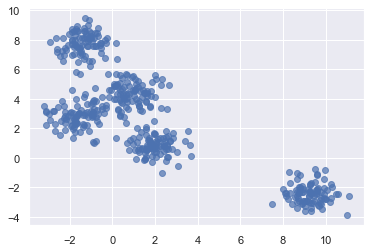

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
from sklearn.datasets import make_blobs
from sklearn.cluster import Birch

# we generate synthetic data, which are good for clustering. 
#This is not happening in the real-world, here we try to have good data for BIRCH
X, clusters = make_blobs(n_samples=450,centers=5,cluster_std=0.70,random_state=0)
plt.scatter(X[:,0], X[:,1], alpha=0.7, edgecolors='b')



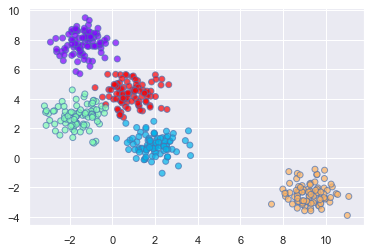

In [2]:

#now lets run the lovely BIRCH algorithm
brc = Birch(branching_factor=50, n_clusters=None, threshold=1.5)
brc.fit(X)

# predict method obtains the list of point from clustered data
labels = brc.predict(X)
#labels

#now we plot clusters with different colors
plt.scatter(X[:,0], X[:,1], c=labels, cmap='rainbow', alpha=0.7, edgecolors='b')


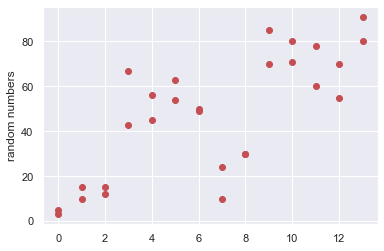

In [4]:
from pyclustering.cluster import cluster_visualizer
from pyclustering.cluster.cure import cure
import numpy as np

X = np.array([[5,3], [10,15], [15,12], [43,67], [45,56],[63,54], [49,50],
    [24,10], [30,30], [85,70], [71,80], [60,78], [70,55], [80,91],])

import matplotlib.pyplot as plt
plt.plot(X, 'ro')
plt.ylabel('random numbers')
plt.show()

[[10, 11, 13, 9], [4, 6, 3, 5, 12], [1, 2, 7, 0, 8]]
Sample:  [[ 5  3]
 [10 15]
 [15 12]
 [43 67]
 [45 56]
 [63 54]
 [49 50]
 [24 10]
 [30 30]
 [85 70]
 [71 80]
 [60 78]
 [70 55]
 [80 91]]


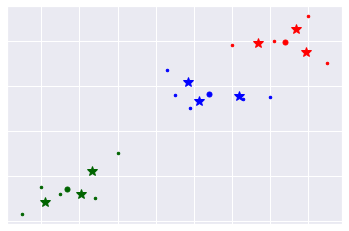

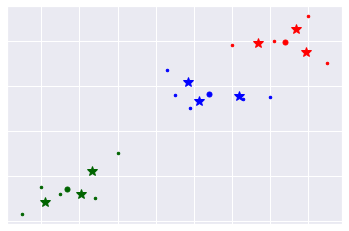

In [5]:

# cure_instance = cure(sample, number_clusters, number_represent_points, compression, ccore_flag)
cure_instance = cure(X, 3, 3)
cure_instance.process()                             
clusters = cure_instance.get_clusters()
print(clusters)

representors = cure_instance.get_representors()
means = cure_instance.get_means()

print("Sample: ", X)

visualizer = cluster_visualizer()
visualizer.append_clusters(clusters, X)

for cluster_index in range(len(clusters)):
     visualizer.append_cluster_attribute(0, cluster_index, representors[cluster_index], '*', 10)
     visualizer.append_cluster_attribute(0, cluster_index, [ means[cluster_index] ], 'o')

visualizer.show()

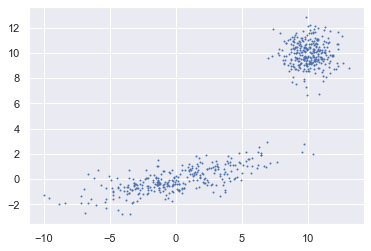

In [5]:

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from sklearn import mixture

n_samples = 300

# generate random sample, two components
np.random.seed(70)

# generate spherical data centered on (20, 20)
shifted_gaussian = np.random.randn(n_samples, 2) +  np.array([10, 10])

# generate zero centered stretched Gaussian data
C = np.array([[0., -0.7], [3.5, .7]])
stretched_gaussian = np.dot(np.random.randn(n_samples, 2), C)

# concatenate the two datasets into the final training set
X_train = np.vstack([shifted_gaussian, stretched_gaussian])

# fit a Gaussian Mixture Model with two components
clf = mixture.GaussianMixture(n_components=2, covariance_type='full')
clf.fit(X_train)


plt.scatter(X_train[:, 0], X_train[:, 1], .9)

plt.show()

<ipython-input-6-b351f7bfc2f3>:11: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  CB = plt.colorbar(CS, shrink=0.8, extend='both')


(-20.0, 30.0, -20.0, 40.0)

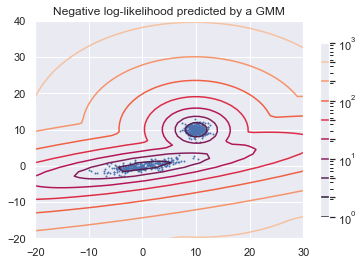

In [6]:

# display predicted scores by the model as a contour plot
x = np.linspace(-20., 30.)
y = np.linspace(-20., 40.)
X, Y = np.meshgrid(x, y)
XX = np.array([X.ravel(), Y.ravel()]).T
Z = -clf.score_samples(XX)
Z = Z.reshape(X.shape)

CS = plt.contour(X, Y, Z, norm=LogNorm(vmin=1.0, 
vmax=1000.0), levels=np.logspace(0, 3, 10))
CB = plt.colorbar(CS, shrink=0.8, extend='both')
plt.scatter(X_train[:, 0], X_train[:, 1], .9)

plt.title('Negative log-likelihood predicted by a GMM')
plt.axis('tight')

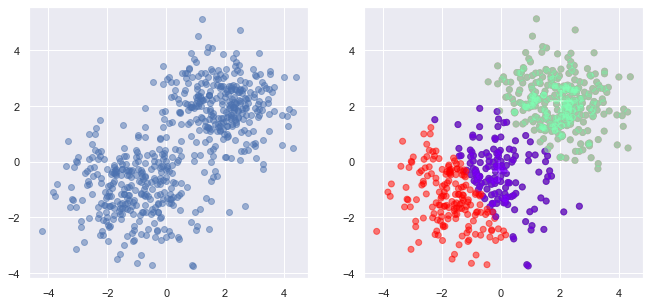

In [8]:

%matplotlib inline
import numpy as np
from fcmeans import FCM
from matplotlib import pyplot as plt

n_samples = 300

X = np.concatenate((
    np.random.normal((-1, -1), size=(n_samples, 2)),
    np.random.normal((2, 2), size=(n_samples, 2))
))
fcm = FCM(n_clusters=3)
fcm.fit(X)

# outputs
fcm_centers = fcm.centers
fcm_labels = fcm.predict(X)

# plot result
f, axes = plt.subplots(1, 2, figsize=(11,5))
axes[0].scatter(X[:,0], X[:,1], alpha=.5)
axes[1].scatter(X[:,0], X[:,1], c=fcm_labels, alpha=.5)
axes[1].scatter(fcm_centers[:,0], fcm_centers[:,1], marker="+", s=500, c='w')
axes[1].scatter(X[:,0], X[:,1], c=fcm_labels, alpha=0.5,cmap=plt.get_cmap('rainbow',3))
plt.savefig('fuzzy-output.jpg')
plt.show()